### SVM(1)

Loading required package: ggplot2

Loading required package: lattice



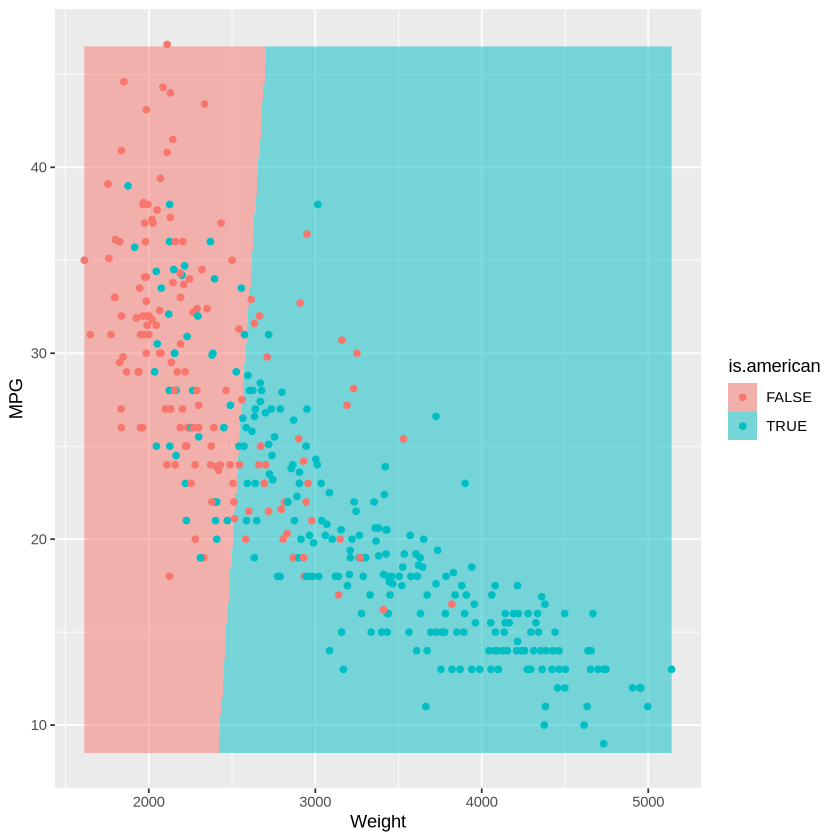

In [1]:
library(data.table)
library(caret)

dt <- fread("data/cars.csv")
dt <- dt[MPG != 0]
dt[, is.american := as.factor(Origin == "US")]

# trainControl for cross validation
ctrl <- trainControl(method = "cv")

# train svmLinear2 model with hyperparameter tunign
# probability = TRUE
model <- train(is.american ~ Weight + MPG, data = dt, method = "svmLinear2",
               tuneGrid = data.frame(cost = c(25, 2.5, 0.25)),
               probability = TRUE, trControl = ctrl)


dt.all <- expand.grid(
  Weight = seq(min(dt$Weight), max(dt$Weight), 1),
  MPG = seq(min(dt$MPG), max(dt$MPG), 1))

# predict on new data
dt.all$is.american <- predict(model, newdata = dt.all)

# plot the predictions
g <- ggplot(mapping = aes(Weight, MPG)) + 
  geom_raster(mapping = aes(fill = is.american), data = dt.all, alpha = 0.5) + 
  geom_point(mapping = aes(color = is.american), data = dt)
print(g)

### SMV poly 

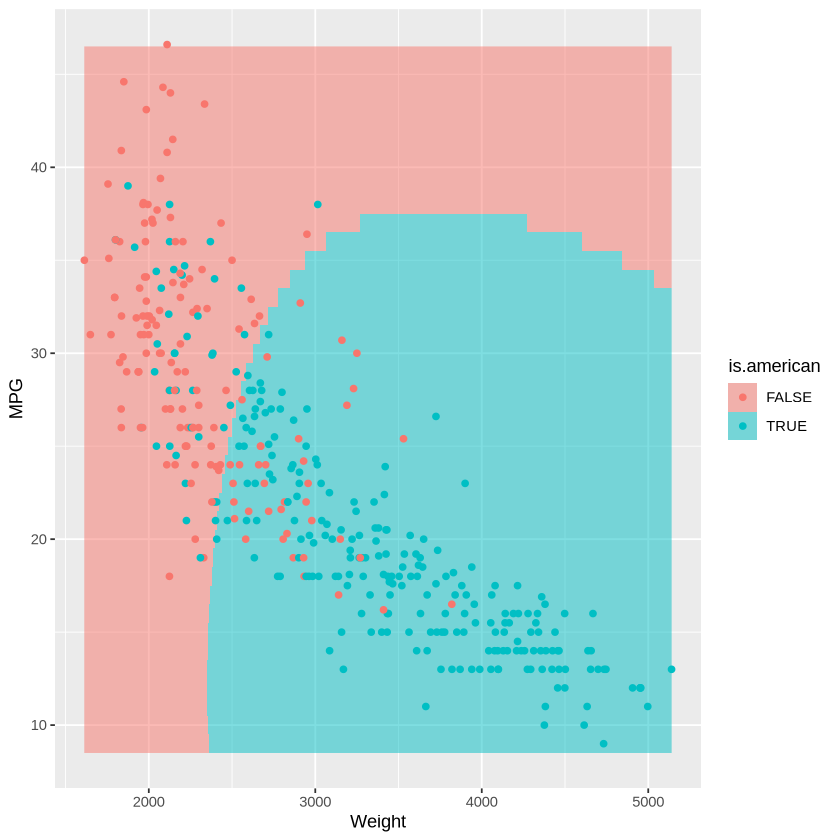

In [2]:
library(data.table)
library(caret)

dt <- fread("data/cars.csv")
dt <- dt[MPG != 0]

# binary target column is.american
dt[, is.american := as.factor(Origin == "US")]

# traincontrol for crossvalidation
ctrl <- trainControl(method = "cv")

# train svmPoly model with hyperparameter tuning
# probability = TRUE
model <- train(is.american ~ Weight + MPG, data = dt, method = "svmPoly",
               tuneGrid = expand.grid(C = c(0.25, 0.5, 1), degree = c(4), scale = c(0.001, 0.01, 0.1)),
               probability = TRUE, trControl = ctrl)

# new data and predict on it
dt.all <- expand.grid(
  Weight = seq(min(dt$Weight), max(dt$Weight), 1),
  MPG = seq(min(dt$MPG), max(dt$MPG), 1))

dt.all$is.american <- predict(model, newdata = dt.all)

# plot the predictions
g <- ggplot(mapping = aes(Weight, MPG)) + 
  geom_raster(mapping = aes(fill = is.american), data = dt.all, alpha = 0.5) + 
  geom_point(mapping = aes(color = is.american), data = dt)
print(g)

### SVM rbf

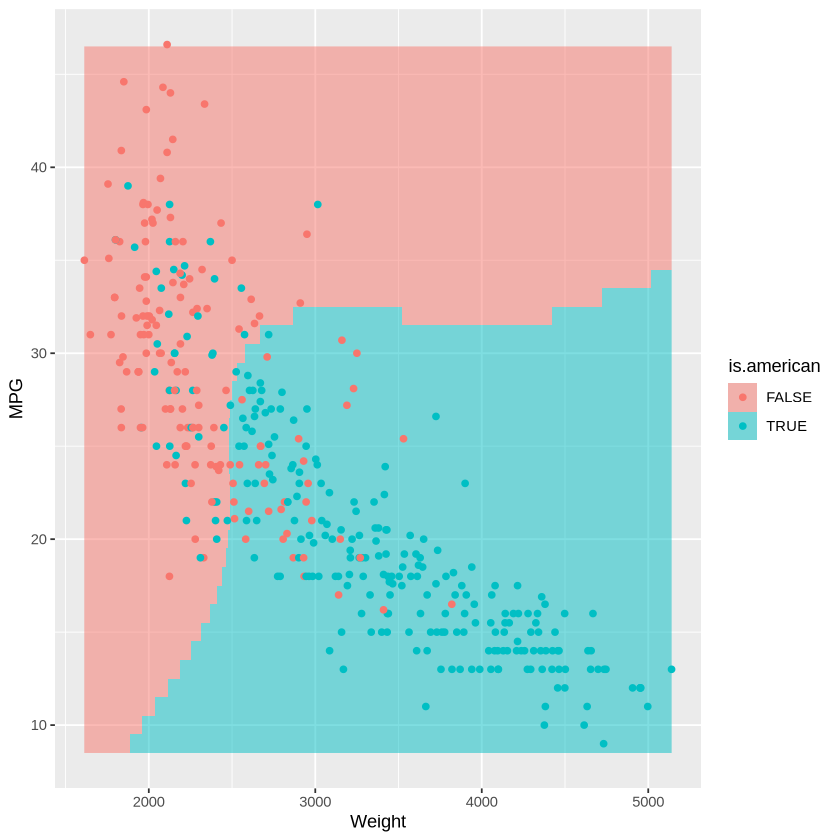

In [3]:
library(data.table)
library(caret)

dt <- fread("data/cars.csv")
dt <- dt[MPG != 0]

# create binary Column is.american
dt[, is.american := as.factor(Origin == "US")]

# train control for cross validation
ctrl <- trainControl(method = "cv")

# train svmRadial Model with hyperparameter tuning
# probability = True
model <- train(is.american ~ Weight + MPG, data = dt, method = "svmRadial",
               tuneGrid = expand.grid(C = c(0.25, 0.5, 1), sigma = c(0.5)),
               probability = TRUE, trControl = ctrl)

# new data and predict on it
dt.all <- expand.grid(
  Weight = seq(min(dt$Weight), max(dt$Weight), 1),
  MPG = seq(min(dt$MPG), max(dt$MPG), 1))
dt.all$is.american <- predict(model, newdata = dt.all)

# plot the predictions
g <- ggplot(mapping = aes(Weight, MPG)) + 
  geom_raster(mapping = aes(fill = is.american), data = dt.all, alpha = 0.5) + 
  geom_point(mapping = aes(color = is.american), data = dt)
print(g)